#Fetching the data from the weatherapi.com website

In [2]:
import requests
import pandas as pd

#List of cities and the api key
api_key = "1fa5b6aa706944a0b3e184044241410"
cities = [
    "Kampala", "Entebbe", "Mbarara", "Jinja", "Gulu", "Arua", "Mbale", "Fort Portal", "Lira", "Masaka",
    "Soroti", "Hoima", "Kabale", "Tororo", "Kasese", "Mukono", "Iganga", "Bushenyi", "Ntungamo", "Luwero",
    "Pallisa", "Kisoro", "Nebbi", "Kira", "Wakiso", "Kayunga", "Masindi", "Mityana", "Kiryandongo", "Moroto",
    "Katakwi", "Adjumani", "Koboko", "Apac", "Kaberamaido", "Kyenjojo", "Ibanda", "Kiruhura", "Kiboga", "Namutumba",
    "Kaliro", "Kamuli", "Mayuge", "Budaka", "Butaleja", "Kyegegwa", "Rukungiri", "Kanungu", "Isingiro",
    "Bukedea", "Amuria", "Amuru", "Kole", "Dokolo", "Nwoya", "Oyam", "Pader", "Zombo", "Yumbe",
    "Kapchorwa", "Kumi", "Amolatar", "Bududa", "Gayaza", "Bweyogerere", "Seeta", "Kasangati", "Bulenga", "Kawempe", "Namugongo", "Makindye", "Lubaga",
    "Kibuli", "Bwaise", "Nkozi", "Mpigi", "Kasubi", "Kansanga", "Kibuye", "Busega", "Katwe", "Lugazi", "Mukono", "Nakawa", "Zana", "Wandegeya", "Kirinya", "Bugembe", "Banda", "Kireka", "Namulanda", "Namasuba", "Kyambogo"
]

In [3]:
#the function defined below is used to fetch data for every city

def get_weather_data_for_city(city):
  url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={city}"
  response = requests.get(url)
  if response.status_code == 200:
    return response.json()
  else:
    print(f"Error fetching data for {city}: { response.status_code}")
    return None

In [4]:
#we initialise a list to store weather data for every single city
weather_data = []

#a loop created to enable fetching weather data through each city
for city in cities:
  data = get_weather_data_for_city(city)
  if data:
    current_weather = data["current"]
    location = data["location"]

    #from here we collect the relevant data that we need to put to use
    weather_data.append({
            'City': location['name'], # 'city' : data['location']['name']
            'Country': location['country'],
            'Region' : location['region'],
            'Local Time': location['localtime'],
            'Temperature (C)': current_weather['temp_c'], # 'temperature c' : data['current']['temp_c]
            'Condition': current_weather['condition']['text'],
            'Humidity (%)': current_weather['humidity'],
            'Wind Speed (kph)': current_weather['wind_kph'],
            'Precipitation (mm)': current_weather['precip_mm'],
    })
df = pd.DataFrame(weather_data)
df.to_excel("weather_data_multiple_cities.xlsx", index=False)
df.sample(20)

,City,Country,Region,Local Time,Temperature (C),Condition,Humidity (%),Wind Speed (kph),Precipitation (mm)
14,Kasese,Uganda,Kasese,2024-10-15 06:55,17.8,Partly Cloudy,86,4.0,0.00
27,Mityana,Uganda,Mubende,2024-10-15 06:55,16.8,Fog,98,3.6,0.00
88,Bandarlampung,Indonesia,Lampung,2024-10-15 10:55,29.1,Sunny,68,8.3,0.00
85,Wandegeya,Uganda,Mayuge,2024-10-15 06:55,17.2,Patchy rain nearby,94,5.0,0.04
67,Bulengart,Gambia,Western,2024-10-15 03:55,23.2,Fog,98,5.8,0.00
36,Ibanda,Uganda,Mbarara,2024-10-15 06:55,16.5,Patchy rain nearby,92,6.1,0.02
13,Tororo,Uganda,Tororo,2024-10-15 06:55,18.3,Partly Cloudy,89,3.6,0.00
42,Mayuge,Uganda,Mayuge,2024-10-15 06:55,17.2,Patchy rain nearby,94,5.0,0.04
79,Busega,Papua New Guinea,Morobe,2024-10-15 13:55,29.1,Patchy rain nearby,63,11.9,0.14
45,Kyegegwa,Uganda,Kyenjojo,2024-10-15 06:55,16.0,Fog,97,3.6,0.00


In [22]:
#df = df[df['Country'] != 'Uganda']
#df

In [5]:
df = df[df['Country'] == 'Uganda']
df

,City,Country,Region,Local Time,Temperature (C),Condition,Humidity (%),Wind Speed (kph),Precipitation (mm)
0,Kampala,Uganda,Kampala,2024-10-15 06:55,18.1,Mist,94,4.3,0.13
1,Entebbe,Uganda,Kalangala,2024-10-15 06:55,20.0,Patchy rain nearby,84,13.3,0.06
2,Mbarara,Uganda,Mbarara,2024-10-15 06:55,18.0,Clear,81,5.4,0.00
3,Jinja,Uganda,Jinja,2024-10-15 06:55,17.2,Patchy rain nearby,94,5.0,0.04
4,Gulu,Uganda,Gulu,2024-10-15 06:55,17.5,Mist,96,6.1,0.00
...,...,...,...,...,...,...,...,...,...
87,Bugembe,Uganda,Mukono,2024-10-15 06:55,17.2,Patchy rain nearby,94,5.0,0.04
89,Kireka,Uganda,Mukono,2024-10-15 06:55,17.6,Mist,95,4.3,0.14
90,Namulanda,Uganda,Mubende,2024-10-15 06:55,17.6,Light rain shower,98,3.6,0.95
91,Namasuba,Uganda,Luwero,2024-10-15 06:55,18.1,Mist,94,4.3,0.13


#Exploratory Data Analysis

In [6]:
df.shape

(74, 9)

In [7]:
df.columns

Index(['City', 'Country', 'Region', 'Local Time', 'Temperature (C)',
       'Condition', 'Humidity (%)', 'Wind Speed (kph)', 'Precipitation (mm)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 92
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                74 non-null     object 
 1   Country             74 non-null     object 
 2   Region              74 non-null     object 
 3   Local Time          74 non-null     object 
 4   Temperature (C)     74 non-null     float64
 5   Condition           74 non-null     object 
 6   Humidity (%)        74 non-null     int64  
 7   Wind Speed (kph)    74 non-null     float64
 8   Precipitation (mm)  74 non-null     float64
dtypes: float64(3), int64(1), object(5)
memory usage: 7.8+ KB


from this we can conclude that there are 74 columns and 9 columns with no missing values in each column, and that the all columns have the right data types.

In [9]:
#checking duplicates
df.duplicated().sum()

1

In [10]:
#show which rows have duplicates and the duplicated
df[df.duplicated(keep=False)]

#df[df.duplicated()]

,City,Country,Region,Local Time,Temperature (C),Condition,Humidity (%),Wind Speed (kph),Precipitation (mm)
15,Mukono,Uganda,Mukono,2024-10-15 06:55,17.6,Mist,95,4.3,0.14
82,Mukono,Uganda,Mukono,2024-10-15 06:55,17.6,Mist,95,4.3,0.14


In [11]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [12]:
#confirming duplicates
df.duplicated().sum()

0

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),73.0,17.606849,1.756126,9.9,17.2,17.60,18.10,21.90
Humidity (%),73.0,90.986301,5.872471,67.0,89.0,93.00,95.00,98.00
Wind Speed (kph),73.0,5.126027,2.407571,3.6,3.6,4.30,5.80,17.30
Precipitation (mm),73.0,0.109863,0.211328,0.0,0.0,0.02,0.13,0.95


In [17]:
df.shape

(73, 9)

#Visualisation

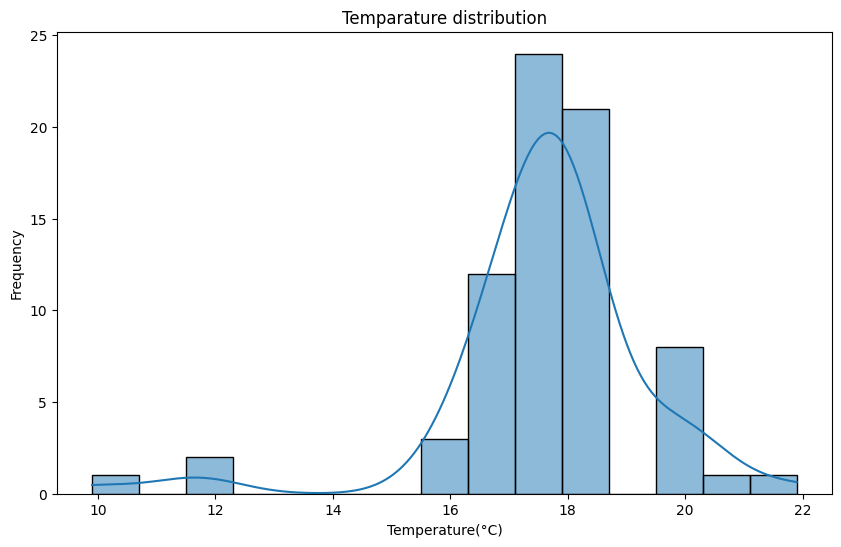

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['Temperature (C)'], bins=15, kde=True)
plt.title ("Temparature distribution")
plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.show()

Insights: The histplot indicates that the most frequently observed temperatures are around 17-18°C, with fewer occurrences of very low or high temperatures



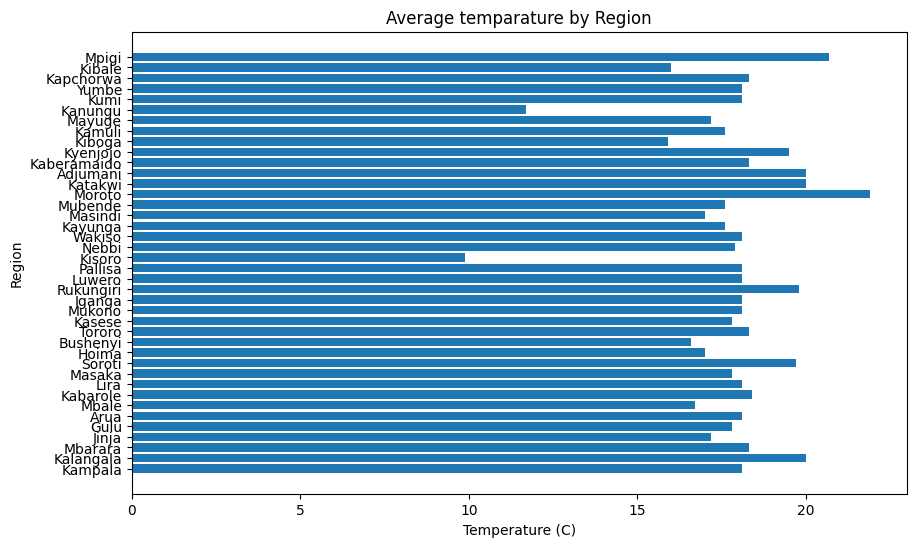

In [18]:
region = df.groupby('Region')['Temperature (C)'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.barh(df['Region'], df['Temperature (C)'])
plt.title("Average temparature by Region")
plt.xlabel('Temperature (C)')
plt.ylabel('Region')
#region = region.sort_values(by='Temperature (C)', ascending=True)
plt.show()

This shows that regions of moroto, mpigi have the highest temperatures i.e above 20 followed by kalangala, soroti, Rukungiri, katakwi and adjumani

Kanungu and Kisoro have some of the lowest temperatures

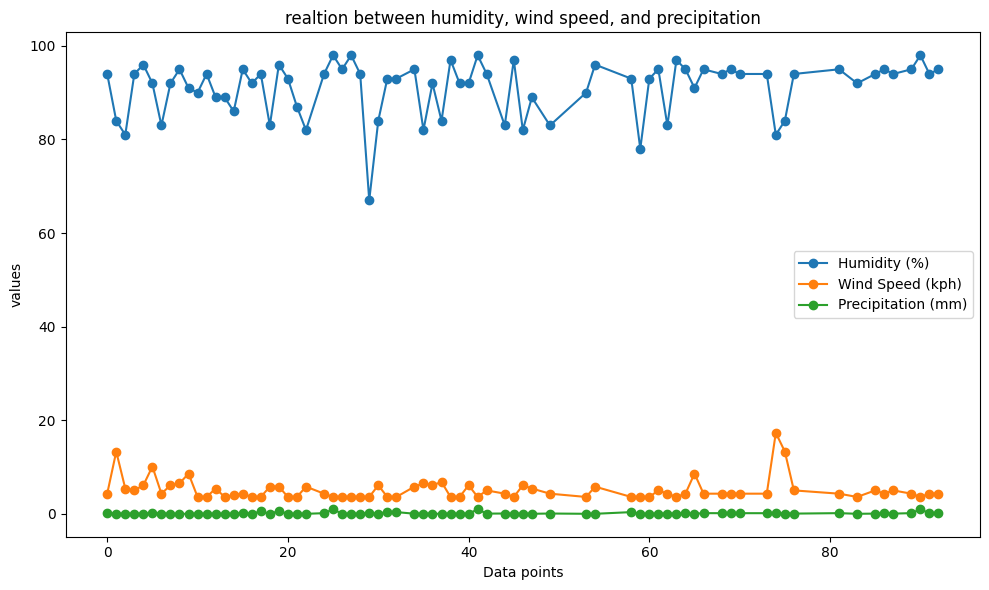

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Humidity (%)'], label='Humidity (%)', marker='o')
plt.plot(df.index, df['Wind Speed (kph)'], label='Wind Speed (kph)', marker='o')
plt.plot(df.index, df['Precipitation (mm)'], label='Precipitation (mm)', marker='o')
plt.title("realtion between humidity, wind speed, and precipitation")
plt.xlabel('Data points')
plt.ylabel('values')
plt.legend(loc='best') # display legends for each line best display automatically
plt.tight_layout()
plt.show()

Insights

- While high humidity indicates moist air, it does not always translate into precipitation as shown. This implies that factors other than just humidity (such as temperature etc) are influencing rainfall.

- High humidity seems to coincide with low wind speeds, suggesting stable atmospheric conditions. Conversely, an increase in wind speed might bring drier air, reducing humidity.

- Wind Speed and Precipitation: There is no strong connection between wind speed variations and changes in precipitation, indicating that wind does not significantly impact rainfall in this scenario.